# TermPicks Data Viewer

This notebook gives an quick look at what the TermPicks data set looks like. You can directly edit any code in this notebook to view your glacier(s) of intrest. Any changes will not be saved when exiting this notebook.

Required packages:

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet as mpl
import folium

In [6]:
pip install geopandas ipyleaflet ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install jupyter-leaflet


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install ipyleaflet

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


### Read in the termpick shapefile and view the header with column values 


In [2]:
termpicks = gpd.read_file('data/traces/TermPicks_V2.shp')
termpicks.head()

,GlacierID,Date,Year,Month,Day,DecDate,QualFlag,Satellite,ImageID,Author,Center_X,Center_Y,geometry
0,278,1990-07-10,1990,7,10,1990.520548,00,Landsat,LT50080111990191KIS00,ESA,-50.025716,69.179644,"LINESTRING (-199180.726 -2266628.206, -199207...."
1,278,1992-07-30,1992,7,30,1992.576503,00,Landsat,LT40090111992212XXX02,ESA,-50.008247,69.193421,"LINESTRING (-199218.862 -2266768.470, -199219...."
2,278,1994-08-29,1994,8,29,1994.657534,00,Landsat,LT50090111994241KIS00,ESA,-50.025263,69.179217,"LINESTRING (-199216.621 -2266698.037, -199244...."
3,278,1998-06-05,1998,6,5,1998.424658,00,Landsat,LT50090111998156KIS00,ESA,-50.007391,69.173692,"LINESTRING (-199262.098 -2266744.984, -199272...."
4,278,2005-03-03,2005,3,3,2005.167123,00,ERS1/ERS2/ENVISAT,ASA_IM__0CNPDE20050303_001650_000000162035_001...,ESA,-49.860570,69.163039,"MULTILINESTRING ((-194704.630 -2267984.208, -1..."


### Read in the TermPicks ID file,set 'Count' to the number of traces in each ID and view the header with column values

In [3]:
ids = gpd.read_file('data/ids/TermPicks_IDs_V1.shp')
ids=ids.set_index('IcePicks')
counts = termpicks['GlacierID'].value_counts()
ids['Count'] = counts
ids.head()

,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
IcePicks,,,,,,,,
1,17,143,Kangilliup Sermia,Kangilliup Sermia,Rink Isbræ,Rink Isbræ,985.0,POINT (-227532.105 -1978637.807)
2,18,142,Umiammakku Sermiat,Umiammakku Sermiat,Umiammakku Isbræ,Umiammakku Sermiat,630.0,POINT (-256185.767 -1975903.172)
3,19,141,Salliarutsip Sermia,Salliarutsip Sermia,Inngia Isbræ,Salliarutsip Sermia,648.0,POINT (-257399.040 -1941371.569)
4,20,137,Sermeq,Sermeq,Upernavik Isstrøm 4,Upernavik Isstrøm 4,110.0,POINT (-298992.514 -1855586.977)
5,21,136,Sermeq,Sermeq,Upernavik Isstrøm 3,Upernavik Isstrøm 3,114.0,POINT (-299988.020 -1847747.370)


### Plot all glaciers with the size of the circle corresponding to the number of traces for the glacier

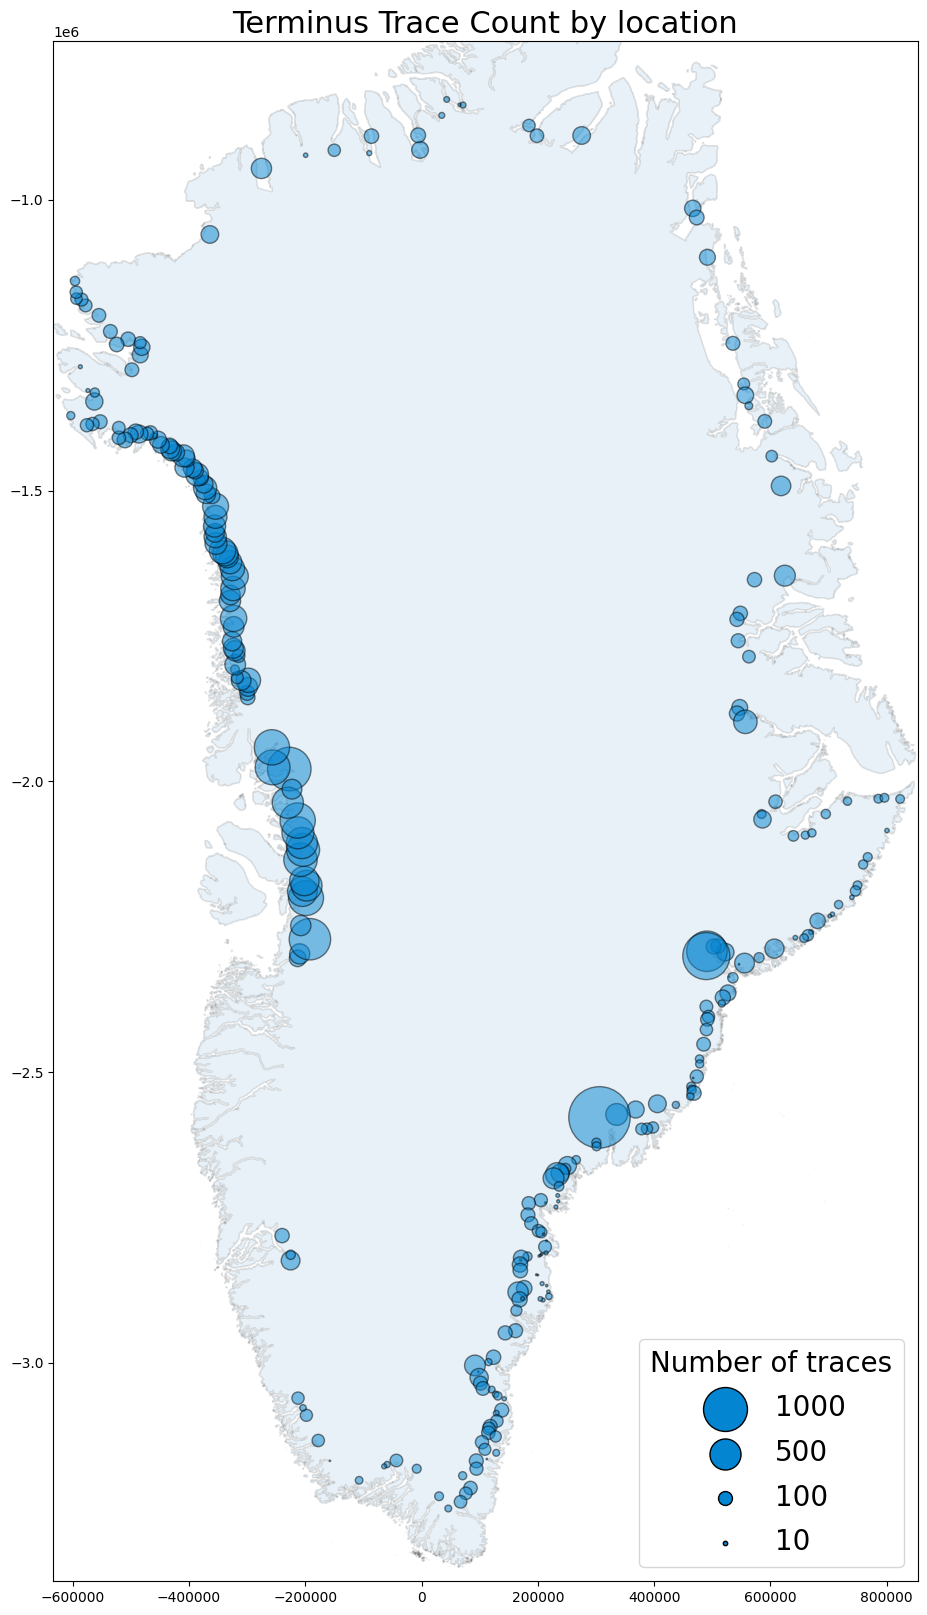

In [4]:
fig, ax = plt.subplots(figsize = (15,20))
sc = ids.plot(markersize=ids['Count'], ax=ax,legend=True, c = '#0485d1',edgecolor='black', alpha=0.5, zorder = 2)
ax.set_xlim(ids.total_bounds[0]-30000, ids.total_bounds[2]+30000);
ax.set_ylim(ids.total_bounds[1]-100000, ids.total_bounds[3]+100000);

ax.set_title('Terminus Trace Count by location', fontdict= {'fontsize': 22})

grl_bound = gpd.read_file('data/grl_bound/GRL_adm0.shp')
grl_bound=grl_bound.to_crs(termpicks.crs)
grl_bound.plot(ax=ax, zorder = 1, alpha = .1, edgecolor='black')

#LEGEND
ax.scatter([0], [0], c='#0485d1', alpha=1, s=1000,
            label='1000', edgecolor='black')
ax.scatter([0], [0], c='#0485d1', alpha=1, s=500,
            label='500', edgecolor='black')
ax.scatter([0], [0], c='#0485d1', alpha=1, s=100,
            label='100', edgecolor='black')
ax.scatter([0], [0], c='#0485d1', alpha=1, s=10,
            label='10', edgecolor='black')

ax.legend(scatterpoints=1, frameon=True,
        labelspacing=0.6, loc='lower right', fontsize=20, title_fontsize=20,title='Number of traces');


In [16]:
import geopandas as gpd
from ipyleaflet import Map, Marker, CircleMarker, Popup, GeoJSON, LegendControl
from ipywidgets import HTML, Layout, VBox, HBox
import pandas as pd

termpicks = gpd.read_file('data/traces/TermPicks_V2.shp')
ids = gpd.read_file('data/ids/TermPicks_IDs_V1.shp')
#ids = ids.set_index('IcePicks')
counts = termpicks['GlacierID'].value_counts()
ids['Count'] = counts

#GeoJSON formatting
ids = ids.to_crs(epsg=4326)  

#Center map at Greenland to plot all data
center = [74.0, -40.0]  

layout = Layout(width='1000px', height='1500px')
m = Map(center=center, zoom=4, layout=layout)

#Creating popups
#def create_popup(row):
    #html_content = f"""<h4>Location Data</h4><table><tr><th>Field</th><th>Value</th></tr><tr><td>Glacier ID</td><td>{row['IcePicks']}</td></tr><tr><td>Count</td><td>{row['Count']}</td></tr><tr><td>Joughin</td><td>{row['Joughin']}</td></tr><tr><td>Mankoff</td><td>{row['Mankoff']}</td></tr><tr><td>Glacier Name</td><td>{row['GrnlndcNam']}</td></tr><tr><td>Official Name</td><td>{row['Official']}</td></tr><tr><td>Alternative Name</td><td>{row['AltName']}</td></tr><tr><td>Reference Name</td><td>{row['RefName']}</td></tr></table>"""
    #return HTML(html_content)

def create_popup(row):
    html_content = """
    <h4>Location Data</h4>
    <table>
        <tr><th>Field</th><th>Value</th></tr>
        <tr><td>Glacier ID</td><td>{IcePicks}</td></tr>
        <tr><td>Count</td><td>{Count}</td></tr>
        <tr><td>Joughin</td><td>{Joughin}</td></tr>
        <tr><td>Mankoff</td><td>{Mankoff}</td></tr>
        <tr><td>Glacier Name</td><td>{GrnlndcNam}</td></tr>
        <tr><td>Official Name</td><td>{Official}</td></tr>
        <tr><td>Alternative Name</td><td>{AltName}</td></tr>
        <tr><td>Reference Name</td><td>{RefName}</td></tr>
    </table>
    """.format(
        IcePicks=row['IcePicks'],
        Count=row['Count'],
        Joughin=row['Joughin'],
        Mankoff=row['Mankoff'],
        GrnlndcNam=row['GrnlndcNam'],
        Official=row['Official'],
        AltName=row['AltName'],
        RefName=row['RefName'],
    )
    return HTML(html_content)

for idx, row in ids.iterrows():
    location = [row.geometry.y, row.geometry.x]
    count = row['Count']

    if pd.isna(count):
        #print(f"Skipping row {idx} due to NaN count value")
        continue
    
    circle = CircleMarker(
        location=location,
        radius=int(count/50),  
        color='#0485d1',
        fill_color='#0485d1',
        fill_opacity=0.5,
        stroke=True,
        weight=1,
    )

    #Hover Popups
    popup = Popup(
        location=location,
        child=create_popup(row),
        close_button=True,
        auto_close=False,
        close_on_escape_key=False,
        min_width=300,  # Adjust popup width
        max_width=300,  # Adjust popup width
        min_height=200  # Adjust popup height
    )
    
    circle.popup = popup
    m.add_layer(circle)

legend_html = """
<div style="padding: 10px; background: white;">
    <h4>Trace Counts</h4>
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="width: 10px; height: 10px; border-radius: 50%; background: #0485d1; margin-right: 5px;"></div><span>10</span>
    </div>
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="width: 20px; height: 20px; border-radius: 50%; background: #0485d1; margin-right: 5px;"></div><span>100</span>
    </div>
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="width: 30px; height: 30px; border-radius: 50%; background: #0485d1; margin-right: 5px;"></div><span>500</span>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 40px; height: 40px; border-radius: 50%; background: #0485d1; margin-right: 5px;"></div><span>1000</span>
    </div>
</div>
"""

legend = HTML(legend_html)

# Display map and custom legend side by side
display(HBox([m, legend]))



#legend_items = [
    #("10", "#0485d1"),
    #("100", "#0485d1"),
    #("500", "#0485d1"),
    #("1000", "#0485d1")
#]

#legend = LegendControl({"10": "#0485d1", "100": "#0485d1", "500": "#0485d1", "1000": "#0485d1"}, 
 #                      name="Trace Counts", 
 #                      position="bottomright")

#m.add_control(legend)

#m


In [6]:
ids

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
0,1,17,143,Kangilliup Sermia,Kangilliup Sermia,Rink Isbræ,Rink Isbræ,NaN,POINT (-51.55988 71.76357)
1,2,18,142,Umiammakku Sermiat,Umiammakku Sermiat,Umiammakku Isbræ,Umiammakku Sermiat,985.0,POINT (-52.38747 71.75669)
2,3,19,141,Salliarutsip Sermia,Salliarutsip Sermia,Inngia Isbræ,Salliarutsip Sermia,630.0,POINT (-52.55258 72.06382)
3,4,20,137,Sermeq,Sermeq,Upernavik Isstrøm 4,Upernavik Isstrøm 4,648.0,POINT (-54.15345 72.77528)
4,5,21,136,Sermeq,Sermeq,Upernavik Isstrøm 3,Upernavik Isstrøm 3,110.0,POINT (-54.22170 72.84375)
...,...,...,...,...,...,...,...,...,...
285,287,12,157,Kangilleq,Kangilleq,Kangilleq Kangigdleq Isbræ,Kangilleq Kangigdleq Isbræ,566.0,POINT (-50.62399 70.72539)
286,288,13,155,Sermeq Silarleq,Sermeq Silarleq,Sermeq Silardleq,Sermeq Silarleq,505.0,POINT (-50.81536 70.79719)
287,289,14,153,Perlerfiup Sermia,Perlerfiup Sermia,Perdlerfiup Sermia,Perlerfiup Sermia,NaN,POINT (-50.88413 70.98493)
288,290,15,None,Kangerluarsuup Sermia,Kangerluarsuup Sermia,Kangerdluarssup Sermia,Kangerluarsuup Sermia,532.0,POINT (-51.44318 71.24299)


### To find your glacier of interest, either search for the name or the ID number from any column. You can edit these cells directly in this notebook*.

*it will not be saved when exiting this notebook.

In [6]:
#By the termpicks ID
ids[ids.index== 36]

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
36,37,0,78,0,0,0,0,172.0,POINT (-59.37692 75.95610)


In [7]:
#By the Moon/Joughin ID
ids[ids.Joughin== 36]

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
21,22,36,112,None,None,None,None,377.0,POINT (-56.25748 74.70773)


In [8]:
#By the RefName
ids[ids['RefName'].str.contains('Helheim', na=False)]

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
179,181,175,231,None,Helheim Gletsjer,None,Helheim Gletsjer,151.0,POINT (-38.23184 66.36494)


In [9]:
#By the GrnlndcNam
ids[ids['GrnlndcNam'].str.contains('Neqip Sermia', na=False)]

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
78,79,87,34,Neqip Sermia,Neqip Sermia,Morris Jesup Gletsjer,None,97.0,POINT (-71.05759 77.90233)


### Plot the terminus traces for your glacier of interest. The CRS is in NSIDC Sea Ice Polar Stereographic North (EPSG:3413). You can edit these cells directly in this notebook*.

*it will not be saved when exiting this notebook.

In [ ]:
neqipSermia = termpicks[termpicks['GlacierID'] == 278]
neqipSermia = neqipSermia[neqipSermia['Date'] > '2000-00-00']
neqipSermia.plot(figsize=(10, 10))

<Axes: >

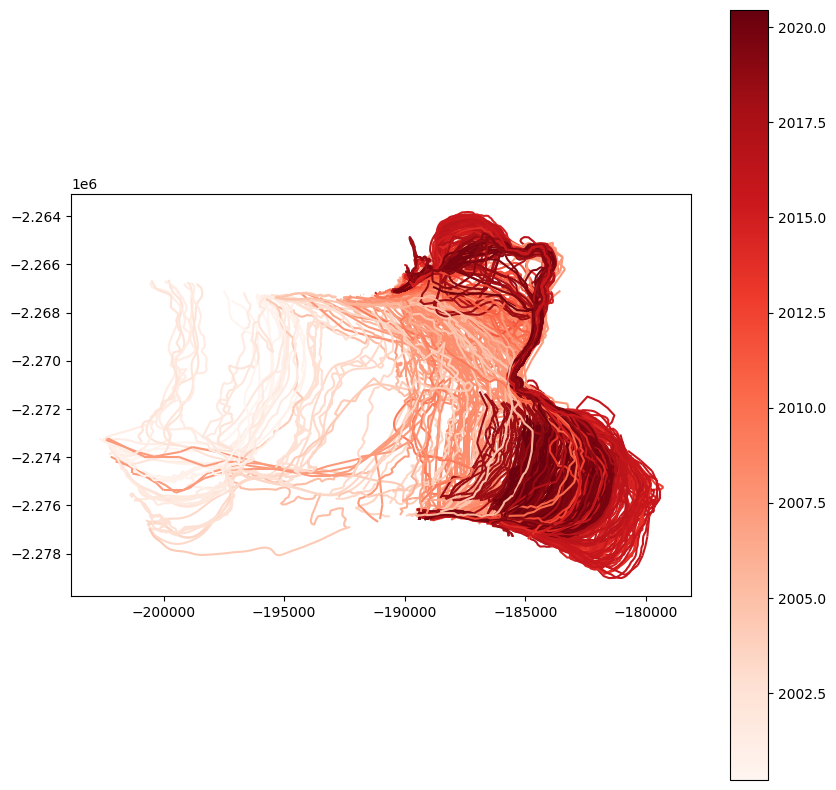

In [11]:
#Color by Decimal date
fig,ax = plt.subplots(figsize=(10, 10))
neqipSermia.plot(column='DecDate',legend=True, cmap = 'Reds', ax =ax)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
from shapely.geometry import Point

ids = ids.set_index(ids['IcePicks'])

#df = pd.read_csv('path_to_your_converted_shapefile.csv')  

# Convert 'Date' column to datetime, ignoring errors
termpicks['Date'] = pd.to_datetime(termpicks['Date'], errors='coerce')

# Filter out invalid dates
termpicks = termpicks.dropna(subset=['Date'])

search_box_id = widgets.Text(
    value='',
    placeholder='Enter ID',
    description='Search ID:',
    disabled=False
)
"""
search_box_start = widgets.Text(
    value='',
    placeholder='Enter Start Date',
    description='Search Start Date:',
    disabled=False
)

search_box_end = widgets.Text(
    value='',
    placeholder='Enter End Date',
    description='Search End Date:',
    disabled=False
)
"""

date_slider = widgets.SelectionRangeSlider(
    options=pd.date_range(start=termpicks['Date'].min(), end=termpicks['Date'].max(), freq='D'),
    index=(0, len(pd.date_range(start=termpicks['Date'].min(), end=termpicks['Date'].max(), freq='D'))-1),
    description='Date Range',
    orientation='horizontal',
    layout={'width': '500px'},
    style={'description_width': 'initial'}

)

date_display = widgets.Text(
    value='',
    placeholder='Date Range',
    description='Selected Range:',
    disabled=False,
    layout={'width': '275px'}
)

# Function to update the date display based on the slider value
def update_date_display(change):
    start_date = change['new'][0].strftime('%Y-%m-%d')
    end_date = change['new'][1].strftime('%Y-%m-%d')
    date_display.value = f'{start_date} to {end_date}'

# Attach the callback to the slider
date_slider.observe(update_date_display, names='value')

# Initialize the date display with the current slider value
update_date_display({'new': date_slider.value})

#dropdown_options_sat = termpicks['Satellite'].unique().tolist()
#dropdown_options_sat.sort()

#sat_filter = widgets.Dropdown(
#    options=dropdown_options_sat,
#    value=dropdown_options_sat[0],
#    description='Select Satellite:',
#    disabled=False,
#)

search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='',
    tooltip='Search for ID',
    icon='search'
)

download_button = widgets.Button(
    description='Download Plots',
    disabled=False,
    button_style='',
    tooltip='Download all plots',
    icon='download'
)

download_button_data = widgets.Button(
    description='Download Data',
    disabled=False,
    button_style='',
    tooltip='Download Plot Data',
    icon='download'
)

title_format_dropdown = widgets.Dropdown(
    options=['ID', 'Date', 'Name', 'Reference Name', 'Alternate Name'],
    value='ID',
    description='Title Format:',
    disabled=False
)

color_map_dropdown = widgets.Dropdown(
    options=['Red', 'Blue', 'Orange'],
    value='Red',
    description='Color Map Format:',
    disabled=False
)

output = widgets.Output()

def search_callback(b):
    global selected_data
    with output:
        clear_output()
        search_id = int(search_box_id.value.strip()) #Check the type
        #start_date = search_box_start.value.strip()
        #end_date = search_box_end.value.strip()

        date_range = date_slider.value
        start_date = pd.to_datetime(date_range[0])
        end_date = pd.to_datetime(date_range[1])
        
        if search_id in termpicks['GlacierID'].values:
            selected_data = termpicks[termpicks['GlacierID'] == search_id]
            selected_data = selected_data[(selected_data['Date'] >= start_date) & (selected_data['Date'] <= end_date)]
            #selected_data.to_file('test.gpkg')
            #selected_data = termpicks[termpicks['Date'] == drop_date]
            display(selected_data)

            #IDs 291-1 and 292-1 not working
                ###DataFrame.set_index
            #Add additional naming options (Reference Name, AltName, etc.)
            title_format = title_format_dropdown.value
            if title_format == 'ID':
                title = f'Plot for ID {search_id}'
            elif title_format == 'Date':
                start_date_str = start_date.strftime('%Y-%m-%d')
                end_date_str = end_date.strftime('%Y-%m-%d')
                title = f'Plot from {start_date_str} to {end_date_str}'
            elif title_format == 'Name':
                #Check why Icepicks is not working
                if (search_id) in ids.index:
                    name = ids.loc[(search_id), 'GrnlndcNam']
                    title = f'Plot for {name}'
            elif title_format == 'Reference Name':
                if (search_id) in ids.index:
                    name = ids.loc[(search_id), 'RefName']
                    title = f'Plot for {name}'
            elif title_format == 'Alternate Name':
                if (search_id) in ids.index:
                    name = ids.loc[(search_id), 'AltName']
                    title = f'Plot for {name}'    
            ###elif title_format == 'Name':
                ###termpicks_id = ids[ids.index == 3]
                ###name = termpicks_id['GrnlndcNam']
                ###title = name

            color_map = color_map_dropdown.value
            if color_map == 'Red':
                cmap = 'Reds'
            elif color_map == 'Blue':
                cmap = 'Blues'
            elif color_map == 'Orange':
                cmap = 'Oranges_r'

            cmap = cmap
            
            #Add different color schemes using cmap
            ax = selected_data.plot(figsize=(10, 10), column = "DecDate", cmap=cmap, legend=True)
            ax.set_title(title)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.grid(True)
            plt.show()

            # Save the plot as a PNG file
            fig = ax.get_figure()
            fig.savefig(f'plot_{search_id}.png')
            
            selected_data.savefig(f'plot_{search_id}.png')  # Save the plot as a PNG file
        else:
            print(f'ID {search_id} not found.')

def download_callback(b):
    with output:
        clear_output()
        zip_filename = 'plots.zip'
        os.system(f'zip {zip_filename} plot_*.png')
        print('Plot downloaded. Go to Homepage')

def download_data_callback(b):
    with output:
        clear_output()
        if 'selected_data' in globals():
            # Convert the DataFrame to a GeoDataFrame
            data_filename = 'data.gpkg'
            gdf = gpd.GeoDataFrame(selected_data, geometry=gpd.points_from_xy(selected_data['Date'], selected_data['Date']))
            gdf.to_file(f'{data_filename}', driver='GPKG')
            print(f'Data downloaded as {data_filename}. Go to Homepage')
        else:
            print('No data to download.')
            
search_button.on_click(search_callback)
download_button.on_click(download_callback)
download_button_data.on_click(download_data_callback)

#display(search_box_id, search_box_start, search_box_end, search_button, download_button, output)

display(search_box_id, date_slider, date_display, title_format_dropdown, color_map_dropdown, search_button, download_button, download_button_data, output)


Text(value='', description='Search ID:', placeholder='Enter ID')

SelectionRangeSlider(description='Date Range', index=(0, 24539), layout=Layout(width='500px'), options=(Timest…

Text(value='1953-04-11 to 2020-06-17', description='Selected Range:', layout=Layout(width='275px'), placeholde…

Dropdown(description='Title Format:', options=('ID', 'Date', 'Name', 'Reference Name', 'Alternate Name'), valu…

Dropdown(description='Color Map Format:', options=('Red', 'Blue', 'Orange'), value='Red')

Button(description='Search', icon='search', style=ButtonStyle(), tooltip='Search for ID')

Button(description='Download Plots', icon='download', style=ButtonStyle(), tooltip='Download all plots')

Button(description='Download Data', icon='download', style=ButtonStyle(), tooltip='Download Plot Data')

Output()

In [18]:
ids

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
IcePicks,,,,,,,,,
1,1,17,143,Kangilliup Sermia,Kangilliup Sermia,Rink Isbræ,Rink Isbræ,NaN,POINT (-51.55988 71.76357)
2,2,18,142,Umiammakku Sermiat,Umiammakku Sermiat,Umiammakku Isbræ,Umiammakku Sermiat,985.0,POINT (-52.38747 71.75669)
3,3,19,141,Salliarutsip Sermia,Salliarutsip Sermia,Inngia Isbræ,Salliarutsip Sermia,630.0,POINT (-52.55258 72.06382)
4,4,20,137,Sermeq,Sermeq,Upernavik Isstrøm 4,Upernavik Isstrøm 4,648.0,POINT (-54.15345 72.77528)
5,5,21,136,Sermeq,Sermeq,Upernavik Isstrøm 3,Upernavik Isstrøm 3,110.0,POINT (-54.22170 72.84375)
...,...,...,...,...,...,...,...,...,...
287,287,12,157,Kangilleq,Kangilleq,Kangilleq Kangigdleq Isbræ,Kangilleq Kangigdleq Isbræ,566.0,POINT (-50.62399 70.72539)
288,288,13,155,Sermeq Silarleq,Sermeq Silarleq,Sermeq Silardleq,Sermeq Silarleq,505.0,POINT (-50.81536 70.79719)
289,289,14,153,Perlerfiup Sermia,Perlerfiup Sermia,Perdlerfiup Sermia,Perlerfiup Sermia,NaN,POINT (-50.88413 70.98493)


In [22]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [10]:
ids

,IcePicks,Joughin,Mankoff,GrnlndcNam,Official,AltName,RefName,Count,geometry
IcePicks,,,,,,,,,
1,1,17,143,Kangilliup Sermia,Kangilliup Sermia,Rink Isbræ,Rink Isbræ,NaN,POINT (-51.55988 71.76357)
2,2,18,142,Umiammakku Sermiat,Umiammakku Sermiat,Umiammakku Isbræ,Umiammakku Sermiat,985.0,POINT (-52.38747 71.75669)
3,3,19,141,Salliarutsip Sermia,Salliarutsip Sermia,Inngia Isbræ,Salliarutsip Sermia,630.0,POINT (-52.55258 72.06382)
4,4,20,137,Sermeq,Sermeq,Upernavik Isstrøm 4,Upernavik Isstrøm 4,648.0,POINT (-54.15345 72.77528)
5,5,21,136,Sermeq,Sermeq,Upernavik Isstrøm 3,Upernavik Isstrøm 3,110.0,POINT (-54.22170 72.84375)
...,...,...,...,...,...,...,...,...,...
287,287,12,157,Kangilleq,Kangilleq,Kangilleq Kangigdleq Isbræ,Kangilleq Kangigdleq Isbræ,566.0,POINT (-50.62399 70.72539)
288,288,13,155,Sermeq Silarleq,Sermeq Silarleq,Sermeq Silardleq,Sermeq Silarleq,505.0,POINT (-50.81536 70.79719)
289,289,14,153,Perlerfiup Sermia,Perlerfiup Sermia,Perdlerfiup Sermia,Perlerfiup Sermia,NaN,POINT (-50.88413 70.98493)
